In [1]:
import os
import cv2
import PIL
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from tensorflow.keras.models import Sequential, load_model, model_from_json
from tkinter import Tk, filedialog

Found 9137 images belonging to 4 classes.
1/1 [==============================] - 0s 110ms/step
Predicted Class: Cedarapplerust
Confidence: 99.99
Top 3 Predictions:
Cedarapplerust: 99.99%
AppleScab: 0.01%
AppleBlackrot: 0.0%
Reasons:
Cedar apple rust is a fungal disease that affects apple trees. It causes orange or rust-colored spots on the leaves, fruit, and twigs. The disease spreads through spores that are released by cedar trees during wet weather. To prevent cedar apple rust, it is important to remove nearby cedar trees, as they serve as a host for the disease. Fungicide sprays can also be used to control the disease. Plant apple varieties that are resistant to cedar apple rust.


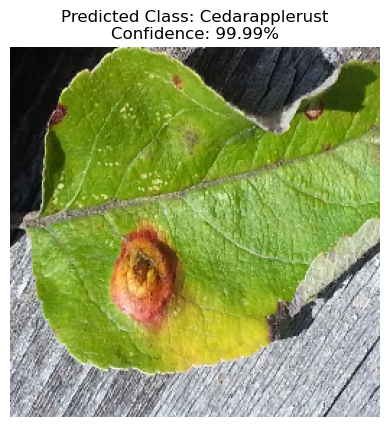

1/1 [==============================] - 0s 160ms/step
Features:
[[ 5.4035707   0.          1.0048652   0.          0.          0.
   0.          0.          4.938781    0.          0.          0.
   0.          0.          0.         20.35622     0.          0.
   1.9300534   0.          0.          2.205705    0.          7.2352757
   0.          1.9950136   0.          0.          2.3762968   0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          7.990721
   0.          0.          0.         10.422207    8.827662    0.
   0.          0.          0.          0.34977198  0.          0.
   0.7072877   0.          0.          0.          4.43917     0.
   6.808648    8.050759    0.          0.        ]]
Protection Measures:
1. Remove nearby cedar trees, as they serve as a host for the disease.
2. Apply fungicides to control the disease.
3. Plant apple varieties that are resistant to cedar apple rust.
4. Maintain

In [6]:



def predict_disease(model, train_set, IMG_SIZE):
    
    root = Tk()
    root.withdraw()
    image_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image Files", "*.jpg;*.png;*.jpeg")])
    
    if not image_path:
        print("No image selected.")
        return
    
    img = load_img(image_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    class_labels = list(train_set.class_indices.keys())

    disease_reasons = {
        'AppleBlackrot': 'Apple black rot is a fungal disease that affects apple trees. It causes black, rotting lesions on the fruit, leaves, and branches. The fungus survives in fallen leaves and mummified fruit during the winter and spreads through rain and wind. Infected fruits should be removed and destroyed to prevent further spread of the disease. Prune the affected branches during the dormant season, and apply fungicides during the growing season to protect new growth.',
        'AppleHealthy': 'No disease detected. The apple tree is healthy.',
        'AppleScab': 'Apple scab is a fungal disease that affects apple trees. It causes dark, scaly lesions on the leaves, fruit, and twigs. The fungus survives in infected fallen leaves and spreads through rain and wind. To prevent apple scab, it is important to maintain good sanitation by removing and destroying infected leaves and fruit. Fungicide sprays can also be used as a preventive measure. Choose apple cultivars that are resistant to scab.',
        'Cedarapplerust': 'Cedar apple rust is a fungal disease that affects apple trees. It causes orange or rust-colored spots on the leaves, fruit, and twigs. The disease spreads through spores that are released by cedar trees during wet weather. To prevent cedar apple rust, it is important to remove nearby cedar trees, as they serve as a host for the disease. Fungicide sprays can also be used to control the disease. Plant apple varieties that are resistant to cedar apple rust.'
    }

    protection_measures = {
        'AppleBlackrot': '1. Remove and destroy infected fruits, leaves, and branches.\n2. Prune affected branches during the dormant season.\n3. Apply fungicides during the growing season to protect new growth.\n4. Improve air circulation around the tree by pruning and thinning branches.\n5. Avoid overhead irrigation to reduce leaf wetness.',
        'AppleHealthy': 'No protection measures required.',
        'AppleScab': '1. Remove and destroy infected leaves and fruit.\n2. Maintain good sanitation by removing fallen leaves.\n3. Apply fungicides as a preventive measure.\n4. Choose apple cultivars that are resistant to scab.',
        'Cedarapplerust': '1. Remove nearby cedar trees, as they serve as a host for the disease.\n2. Apply fungicides to control the disease.\n3. Plant apple varieties that are resistant to cedar apple rust.\n4. Maintain good sanitation by removing fallen leaves and fruit.'
    }

    predicted_class = class_labels[predicted_class_index]
    confidence = round(100 * np.max(predictions[0]), 2)

    top_3_indices = np.argsort(predictions[0])[::-1][:3]
    top_3_classes = [class_labels[i] for i in top_3_indices]
    top_3_probabilities = predictions[0][top_3_indices]

    print("Predicted Class:", predicted_class)
    print("Confidence:", confidence)
    print("Top 3 Predictions:")
    for i in range(3):
        print(f"{top_3_classes[i]}: {round(100 * top_3_probabilities[i], 2)}%")

    print("Reasons:")
    print(disease_reasons.get(predicted_class, "Reasons not available."))

    plt.imshow(img)
    plt.axis('off')
    plt.title("Predicted Class: " + predicted_class + "\nConfidence: " + str(confidence) + "%")
    plt.show()

    intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    features = intermediate_layer_model.predict(img_array)

    print("Features:")
    print(features)

    print("Protection Measures:")
    print(protection_measures.get(predicted_class, "Protection measures not available."))

model_path = 'Apple_Disease_Detection.h5'
train_dir = 'train'
IMG_SIZE = (256, 256)

model = load_model(model_path)
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
train_set = train_gen.flow_from_directory(
    train_dir,
    subset='training',
    class_mode='categorical',
    target_size=IMG_SIZE,
    batch_size=8
)

predict_disease(model, train_set, IMG_SIZE)
